In [1]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install joblib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.ensemble import ExtraTreesClassifier # for training the algorithm
import joblib # for saving algorithm and preprocessing objects

In [3]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Ctgta123/Evaluacion/main/Anexo%20Forma%20B_demo_round_traces.csv',sep=(';'))

In [4]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [5]:
#importa la libreria LabelEncoder para transformar los datos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
#Cambiamos el nombre de los mapas
#Mapa de_inferno = 1
#Mapa de_dust2 = 0
#Mapa de_mirage = 2
#Mapa de_nuke  = 3
df.Map = le.fit_transform(df.Map)
#-------------------------------------------------------
#Cambiamos el nombre del equipo
#Team Terrorist = 1
#Team CounterTerrorist = 0
df.Team = le.fit_transform(df.Team)
#----------------------------------------------------------
#Cambiamos los False por 0 y True por 1
df.RoundWinner  = le.fit_transform(df.RoundWinner)
df.MatchWinner  = le.fit_transform(df.MatchWinner)
df.Survived = le.fit_transform(df.Survived)
df.AbnormalMatch  = le.fit_transform(df.AbnormalMatch)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X = df[['MatchFlankKills', 'MatchAssists', 'MatchHeadshots']]
y = df.MatchKills
# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 4, random_state = 29)
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
Y_pred = modelo.predict(X_test)
# Evaluación del modelo
print('Precisión del modelo (en entrenamiento):', modelo.score(X_train,y_train))
print('Precisión del modelo (en validación):', modelo.score(X_test, y_test))

Precisión del modelo (en entrenamiento): 0.7430692665800872
Precisión del modelo (en validación): 0.7439373938252705


Profundidad del árbol: 4
Número de nodos terminales: 16


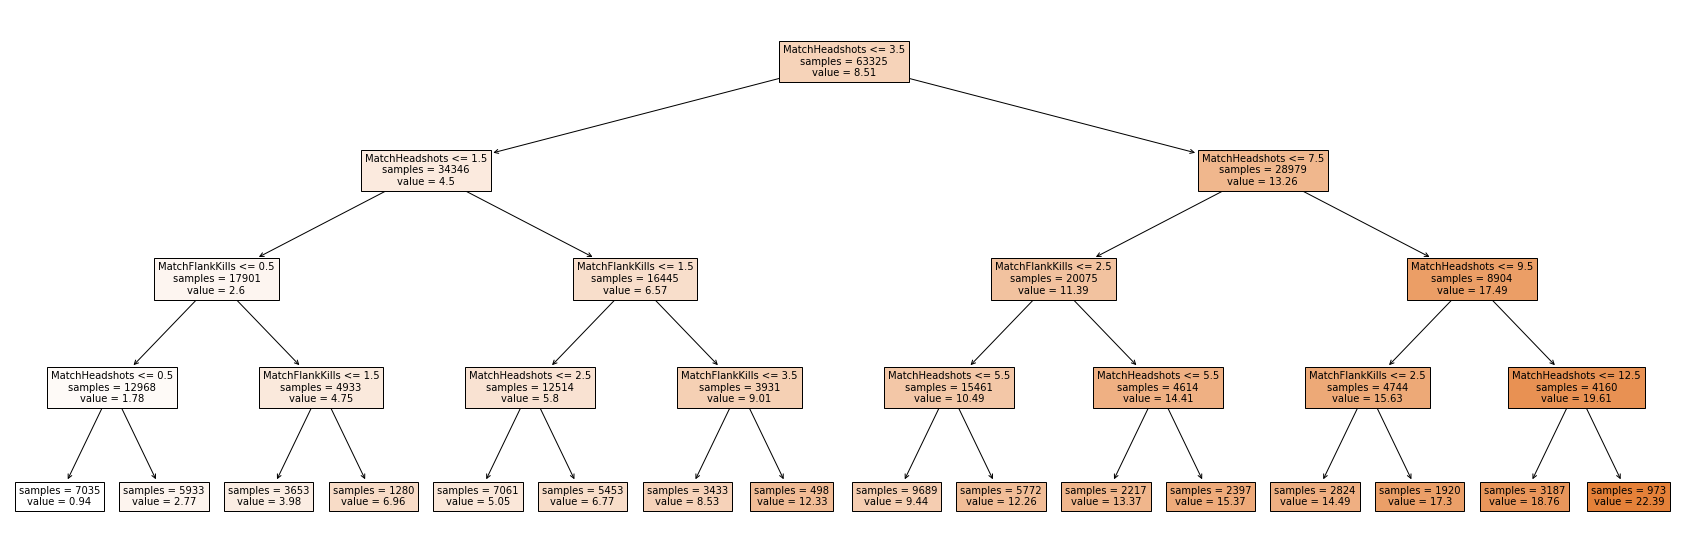

In [8]:
import matplotlib.pyplot as plt
#Crea el arbol basandose en el modelo y se eliminan todas las columnas menos las columnas seleccionadas.
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
decision_tree = modelo,
feature_names = df.drop(columns = ['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills','AvgMatchKillDist']).columns,
class_names = 'MatchKills',
filled = True,
impurity = False,
fontsize = 10,
precision = 2,
ax = ax
)

In [9]:
#Se importan las librerias necesarias para crear el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Se separan las variables predictoras y la predecida
x = df[['MatchFlankKills', 'MatchAssists', 'MatchHeadshots']] # Variables independientes
y = df['MatchKills'] # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)
# Tipo de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.77
MSE: 8.74
Score del modelo : 0.77


In [10]:
#Enseña el resultado del modelo predictivo
print(modelo.predict([[0,    2,    2]]))

[4.97991845]


c:\users\brandon\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
